1.5 

(a) 

$Y-\hat{Y} \perp Y_{new}-\hat{Y}_{new}$ 

(b) 

$X \sim\mathcal{N}(0,\Sigma) \Rightarrow\Sigma^{-\frac{1}{2}}X\sim\mathcal{N}(0,\Sigma^{-\frac{1}{2}}\Sigma{\Sigma^{-\frac{1}{2}}}^T) = \mathcal{N}(0, I) $

$M = (I + Z(X^TX)^{-1}Z^T)^{-\frac{1}{2}}$

To compute the square root inverse of a real symmetric matrix, we use eigendecompisition 

$A=Q\Lambda Q^T, A^{-\frac{1}{2}}=Q\Lambda^{-\frac{1}{2}} Q^T$

https://en.wikipedia.org/wiki/Eigendecomposition_of_a_matrix

(c)

$M(Y_{new}-\hat{Y}_{new})\sim\mathcal{N}(0, \sigma^2I_n)\qquad$
$\|M(Y_{new}-\hat{Y}_{new})\|^2_2\sim\sigma^2\chi^2_n$

$(Y-\hat{Y})\sim\mathcal{N}(0, \sigma^2I_m)\qquad$
$\|(Y-\hat{Y})\|^2_2\sim\sigma^2\chi^2_{m-d}$

$ \frac{\frac{1}{n}\|M(Y_{new}-\hat{Y}_{new})\|^2_2}{\frac{1}{m-d} \|(Y-\hat{Y})\|^2_2}\sim\mathcal{F}^n_{m-d} $

(d)

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [16]:
df = pd.read_csv('simplified-sfo-weather.csv')

def generate(data):
    N = data.shape[0]
    t = data['day'].to_numpy() 

    X = np.ones((N, 3))
    X[:,1] = np.sin(2 * np.pi / 365 * (t-1))
    X[:,2] = np.cos(2 * np.pi / 365 * (t-1))

    Y = data['precip'].to_numpy()

    return X, Y

In [17]:
df

,year,day,precip,templow,temphigh
0,1960,1,0.00,34.0,48.0
1,1960,2,0.00,29.0,47.0
2,1960,3,0.00,38.0,53.0
3,1960,4,0.00,33.0,56.0
4,1960,5,0.00,35.0,52.0
...,...,...,...,...,...
22277,2020,363,0.02,47.0,56.0
22278,2020,364,0.00,41.0,61.0
22279,2020,365,0.04,40.0,57.0
22280,2020,366,0.03,47.0,60.0


In [42]:
from scipy.stats import f

d = 3
years = np.arange(1966, 2021)
p_values = np.zeros_like(years, dtype=np.float64)
for i, year in enumerate(years):
    X, Y = generate(df[df['year']<year])
    m = len(Y)
    beta_hat = np.linalg.solve(X.T @ X, X.T @ Y)

    Z, Y_new = generate(df[df['year']==year])
    n = len(Y_new)
    M = np.eye(n) + Z @ np.linalg.solve(X.T @ X, Z.T)  # I + Z(X^T X)^{-1} Z^T
    eigenvalues, eigenvectors = np.linalg.eigh(M)  # eigendecomposition
    M = eigenvectors @ np.diag(1 / np.sqrt(eigenvalues)) @ eigenvectors.T  # (I + Z(X^T X)^{-1} Z^T)^{-1/2}

    A = (1 / n * np.linalg.norm(M @ (Y_new - Z @ beta_hat), 2) ** 2)\
        / (1 / (m - d) * np.linalg.norm(Y - X @ beta_hat, 2) ** 2)
    p = 1 - f.cdf(A, n, m-d)
    p_values[i] = p

In [45]:
for p, year in zip([round(p, 5) for p in p_values], years):
    print(f'p value for year {year}:', p)

p value for year 1966: 1.0
p value for year 1967: 0.0
p value for year 1968: 0.99998
p value for year 1969: 0.15798
p value for year 1970: 0.34794
p value for year 1971: 1.0
p value for year 1972: 0.98563
p value for year 1973: 0.0
p value for year 1974: 1.0
p value for year 1975: 0.99965
p value for year 1976: 1.0
p value for year 1977: 1.0
p value for year 1978: 0.00133
p value for year 1979: 0.0
p value for year 1980: 0.98222
p value for year 1981: 0.00045
p value for year 1982: 0.0
p value for year 1983: 0.0
p value for year 1984: 1.0
p value for year 1985: 1.0
p value for year 1986: 0.76602
p value for year 1987: 1.0
p value for year 1988: 1.0
p value for year 1989: 1.0
p value for year 1990: 1.0
p value for year 1991: 1.0
p value for year 1992: 0.98565
p value for year 1993: 0.00778
p value for year 1994: 0.83544
p value for year 1995: 0.0
p value for year 1996: 8e-05
p value for year 1997: 0.63416
p value for year 1998: 0.0
p value for year 1999: 1.0
p value for year 2000: 0.902

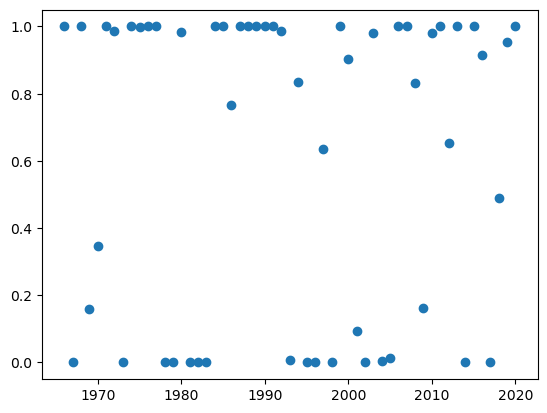

In [46]:
plt.scatter(years, p_values)
plt.show()

(e)

No. Maybe there is non linearity in the data that is not caputured by this linear model.